In [ ]:
import json
import pandas as pd
import ast
import numpy as np

with open('feature_names.json', 'r') as json_file:
    feature_dict = json.load(json_file)
    
number_to_feature = {v: k for k, v in feature_dict.items()} 

reportFeatureSelectionDf = pd.read_excel('/Users/wachiii/Workschii/brain-mdd/models/feature_selection/results_280225.xlsx')

In [ ]:
channelLst = ["Fp1", "Fp2", "F3", "F4", "C3", "C4", "P3", "P4", "O1", "O2", "F7", "F8", "T3", "T4", "T5", "T6"]
bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

psdFeatureNames = [f'PSD_{ch}_{band}' for ch in channelLst for band in bands]
relativePowerFeatureNames = [f'RelativePower_{ch}_{band}' for ch in channelLst for band in bands]
coh_pairs = [(channelLst[i], channelLst[j]) for i in range(len(channelLst)) for j in range(i+1, len(channelLst))]
cohFeatureNames = [f'Coherence_{ch1}_{ch2}_{band}' for ch1, ch2 in coh_pairs for band in bands]
hfdFeatureNames = [f'HFD_{ch}' for ch in channelLst]
cdFeatureNames = [f'CD_{ch}' for ch in channelLst]
allFeatureNames = (
    psdFeatureNames + relativePowerFeatureNames + cohFeatureNames + hfdFeatureNames + cdFeatureNames
)
print(f"Total number of features: {len(allFeatureNames)}") 

# import json
# feature_dict = {feature_name: index+1 for index, feature_name in enumerate(allFeatureNames)}

# with open('feature_names.json', 'w') as json_file:
#     json.dump(feature_dict, json_file, indent=4)

In [28]:
significantFeat = reportFeatureSelectionDf["significant_features"]
significantFeat.head()

0                                                   []
1    [81, 84, 86, 88, 90, 91, 92, 93, 94, 99, 100, ...
2    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
3                                                   []
4    [81, 84, 86, 88, 90, 91, 92, 93, 94, 99, 100, ...
Name: significant_features, dtype: object

In [ ]:
all_significant_features = []

for features_str in reportFeatureSelectionDf["significant_features"]:
    features_list = ast.literal_eval(features_str)
    all_significant_features.append(features_list)

In [30]:
print(all_significant_features)

[[], [81, 84, 86, 88, 90, 91, 92, 93, 94, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 134, 139, 140, 142, 145, 147, 149, 151, 155, 157, 161, 185, 208, 223, 249, 251, 264, 280, 282, 291, 296, 298, 323, 329, 331, 347, 350, 352, 360, 371, 380, 382, 383, 391, 395, 412, 419, 420, 421, 422, 426, 460, 467, 473, 479, 494, 502, 504, 518, 520, 521, 533, 535, 536, 538, 544, 560, 567, 569, 572, 577, 581, 587, 590, 597, 605, 612, 618, 622, 623, 624, 628, 634, 637, 638, 639, 640, 641, 650, 653, 655, 656, 658, 663, 664, 667, 686, 687, 692, 697, 701, 708, 710, 720, 724, 725, 729, 732, 736, 738, 740, 742, 743, 744, 748, 751, 752, 757, 759, 761, 762, 763, 771], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 6

In [31]:
feature_counts = {
    'psd': 0,
    'relative_power': 0,
    'coherence': 0,
    'hfd': 0,
    'cd': 0
}

# Loop over each row in the significant features list
for feature_list in all_significant_features:
    if isinstance(feature_list, list):  # Ensure it's a list
        for feature_number in feature_list:
            feature_number_str = str(feature_number)  # Convert feature number to string
            
            # Check if the feature number exists in the reversed dictionary
            if feature_number in number_to_feature:
                feature_name = number_to_feature[feature_number]
                print(f"Feature number: {feature_number} -> Feature name: {feature_name}")  # Debugging line
                
                # Check the prefix of the feature name to determine its type
                if feature_name.startswith("PSD"):
                    feature_type = "psd"
                elif feature_name.startswith("RelativePower"):
                    feature_type = "relative_power"
                elif feature_name.startswith("Coherence"):
                    feature_type = "coherence"
                elif feature_name.startswith("HFD"):
                    feature_type = "hfd"
                elif feature_name.startswith("CD"):
                    feature_type = "cd"
                else:
                    continue  # Skip if it's an unknown feature type
                
                # Increment the count for the corresponding feature type
                if feature_type in feature_counts:
                    feature_counts[feature_type] += 1
            else:
                print(f"Feature number {feature_number} not found in JSON.")  # Debugging line

# Output the counts for each feature type
print("Feature counts:")
for feature_type, count in feature_counts.items():
    print(f"{feature_type}: {count}")

Feature number: 81 -> Feature name: RelativePower_Fp1_Delta
Feature number: 84 -> Feature name: RelativePower_Fp1_Beta
Feature number: 86 -> Feature name: RelativePower_Fp2_Delta
Feature number: 88 -> Feature name: RelativePower_Fp2_Alpha
Feature number: 90 -> Feature name: RelativePower_Fp2_Gamma
Feature number: 91 -> Feature name: RelativePower_F3_Delta
Feature number: 92 -> Feature name: RelativePower_F3_Theta
Feature number: 93 -> Feature name: RelativePower_F3_Alpha
Feature number: 94 -> Feature name: RelativePower_F3_Beta
Feature number: 99 -> Feature name: RelativePower_F4_Beta
Feature number: 100 -> Feature name: RelativePower_F4_Gamma
Feature number: 101 -> Feature name: RelativePower_C3_Delta
Feature number: 102 -> Feature name: RelativePower_C3_Theta
Feature number: 104 -> Feature name: RelativePower_C3_Beta
Feature number: 105 -> Feature name: RelativePower_C3_Gamma
Feature number: 106 -> Feature name: RelativePower_C4_Delta
Feature number: 107 -> Feature name: RelativePowe

In [ ]:
print("Feature counts:")
for feature_type, count in feature_counts.items():
    print(f"{feature_type}: {count}")

Feature counts:
psd: 400
relative_power: 415
coherence: 3495
hfd: 85
cd: 0


## Model Performance

In [5]:
import dotenv
import os

dotenv.load_dotenv()
allFeatureCvReportPath = os.getenv("ALL_FEATURES_CV_DIR_PATH") + "results_allfeatures.xlsx"
bandpowerCvReportPath = os.getenv("BANDPOWER_FEATURES_CV_DIR_PATH") + "results_bandpower.xlsx"
cdCvReportPath = os.getenv("CD_FEATURES_CV_DIR_PATH") + "results_cd.xlsx"
cohCvReportPath = os.getenv("COHERENCE_FEATURES_CV_DIR_PATH") + "results_coh.xlsx"
hfdCvReportPath = os.getenv("HFD_FEATURES_CV_DIR_PATH") + "results_hfd.xlsx"
relativePowerPath = os.getenv("RELATIVEPOWER_FEATURES_CV_DIR_PATH") + "results_relativepower.xlsx"



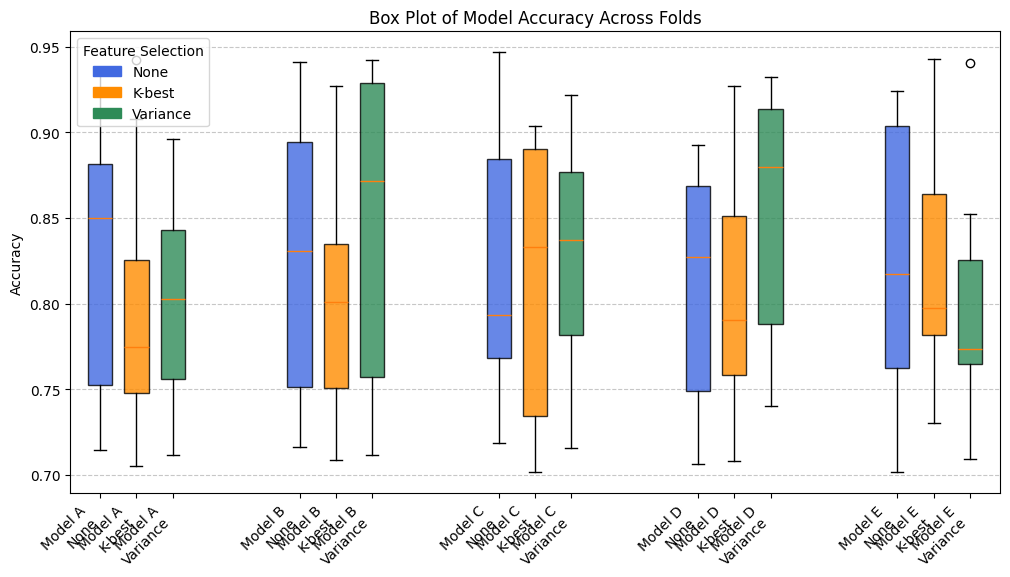

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
models = ["Model A", "Model B", "Model C", "Model D", "Model E"]
feature_selections = ["None", "K-best", "Variance"]

data = [np.random.uniform(0.7, 0.95, 10) for _ in range(15)]  # Replace with actual fold accuracies

# Colors for feature selection methods
colors = {"None": "royalblue", "K-best": "darkorange", "Variance": "seagreen"}

# Adjusted x positions: Increase spacing between different models
x_positions = []
gap = 1.5  # Space between models
current_x = 0

for i in range(len(models)):
    for j in range(len(feature_selections)):
        x_positions.append(current_x)
        current_x += 0.6  # Spacing within the model
    current_x += gap  # Extra space between models

# Assign colors based on feature selection technique
box_colors = [colors[fs] for m in models for fs in feature_selections]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot
box = ax.boxplot(data, positions=x_positions, patch_artist=True, widths=0.4)

# Apply colors
for patch, color in zip(box["boxes"], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

# Customization
x_labels = [f"{m}\n{fs}" for m in models for fs in feature_selections]
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Accuracy")
ax.set_title("Box Plot of Model Accuracy Across Folds")

# Legend (one entry per feature selection method)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[fs]) for fs in feature_selections]
ax.legend(handles, feature_selections, title="Feature Selection", loc="upper left")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
